In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
store_data = pd.read_csv('store.csv')


C:\Users\SubodhG\AppData\Local\Temp\ipykernel_101196\1502978286.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


In [4]:
train_data['public_holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x == 'a' else 0)
train_data['easter_holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x == 'b' else 0)
train_data['christmas_holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x == 'c' else 0)
test_data['public_holiday'] = test_data['StateHoliday'].apply(lambda x: 1 if x == 'a' else 0)
test_data['easter_holiday'] = test_data['StateHoliday'].apply(lambda x: 1 if x == 'b' else 0)
test_data['christmas_holiday'] = test_data['StateHoliday'].apply(lambda x: 1 if x == 'c' else 0)


In [ ]:
train_data.drop(columns='StateHoliday',inplace=True)
test_data.drop(columns='StateHoliday',inplace=True)

In [6]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])


In [7]:
train_data = train_data.sort_values(by=['Date', 'Store'])
test_data = test_data.sort_values(by=['Date', 'Store'])



In [8]:
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['Year'] = test_data['Date'].dt.year

In [9]:
train_data


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,christmas_holiday,Month,Year
1016095,1,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
1016096,2,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
1016097,3,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
1016098,4,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
1016099,5,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5,2015-07-31,5723,422,1,1,1,0,0,0,7,2015
1111,1112,5,2015-07-31,9626,767,1,1,1,0,0,0,7,2015
1112,1113,5,2015-07-31,7289,720,1,1,1,0,0,0,7,2015
1113,1114,5,2015-07-31,27508,3745,1,1,1,0,0,0,7,2015


In [10]:
test_data.drop(columns='Id',inplace=True)

In [11]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
df = pd.merge(train_data, store_data, on='Store')
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,2013-01-01,0,0,0,0,1,1,0,...,2013,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,2,2013-01-01,0,0,0,0,1,1,0,...,2013,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,2,2013-01-01,0,0,0,0,1,1,0,...,2013,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2,2013-01-01,0,0,0,0,1,1,0,...,2013,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,2,2013-01-01,0,0,0,0,1,1,0,...,2013,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,5,2015-07-31,5723,422,1,1,1,0,0,...,2015,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,5,2015-07-31,9626,767,1,1,1,0,0,...,2015,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,5,2015-07-31,7289,720,1,1,1,0,0,...,2015,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,5,2015-07-31,27508,3745,1,1,1,0,0,...,2015,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
df['StoreType'].value_counts()

StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

In [15]:
df['StoreType'] = df['StoreType'].astype('category')
df['Assortment'] = df['Assortment'].astype('category')


In [16]:
df = pd.get_dummies(df, columns=['StoreType', 'Assortment'], drop_first=True)


In [17]:
binary_cols = ['StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']

for col in binary_cols:
    df[col] = df[col].astype(int)



In [18]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   SchoolHoliday              1017209 non-null  int64         
 8   public_holiday             1017209 non-null  int64         
 9   easter_holiday             1017209 non-null  int64         
 10  christmas_holiday          1017209 non-null  int64         
 11  Month                      1017209 no

In [19]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2,2013-01-01,0,0,0,0,1,1,0,...,2008.0,0,NaN,NaN,NaN,0,1,0,0,0
1,2,2,2013-01-01,0,0,0,0,1,1,0,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
2,3,2,2013-01-01,0,0,0,0,1,1,0,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
3,4,2,2013-01-01,0,0,0,0,1,1,0,...,2009.0,0,NaN,NaN,NaN,0,1,0,0,1
4,5,2,2013-01-01,0,0,0,0,1,1,0,...,2015.0,0,NaN,NaN,NaN,0,0,0,0,0


In [20]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].max(), inplace=True)



C:\Users\SubodhG\AppData\Local\Temp\ipykernel_101196\3594135097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].max(), inplace=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   SchoolHoliday              1017209 non-null  int64         
 8   public_holiday             1017209 non-null  int64         
 9   easter_holiday             1017209 non-null  int64         
 10  christmas_holiday          1017209 non-null  int64         
 11  Month                      1017209 no

In [22]:
df['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
df['CompetitionOpenSinceYear'].fillna(1900, inplace=True)
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)


C:\Users\SubodhG\AppData\Local\Temp\ipykernel_101196\619058340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
C:\Users\SubodhG\AppData\Local\Temp\ipykernel_101196\619058340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [23]:
df['PromoInterval'] = df['PromoInterval'].fillna('')


In [24]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2,2013-01-01,0,0,0,0,1,1,0,...,2008.0,0,0.0,0.0,,0,1,0,0,0
1,2,2,2013-01-01,0,0,0,0,1,1,0,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
2,3,2,2013-01-01,0,0,0,0,1,1,0,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
3,4,2,2013-01-01,0,0,0,0,1,1,0,...,2009.0,0,0.0,0.0,,0,1,0,0,1
4,5,2,2013-01-01,0,0,0,0,1,1,0,...,2015.0,0,0.0,0.0,,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,5,2015-07-31,5723,422,1,1,1,0,0,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
1017205,1112,5,2015-07-31,9626,767,1,1,1,0,0,...,2006.0,0,0.0,0.0,,0,1,0,0,1
1017206,1113,5,2015-07-31,7289,720,1,1,1,0,0,...,1900.0,0,0.0,0.0,,0,0,0,0,1
1017207,1114,5,2015-07-31,27508,3745,1,1,1,0,0,...,1900.0,0,0.0,0.0,,0,0,0,0,1


In [25]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

for month in months:
    df[f'Promo_{month}'] = df['PromoInterval'].apply(lambda x: 1 if month in x else 0)


In [26]:
df.drop('PromoInterval', axis=1, inplace=True)


In [27]:
df.drop('Date',axis=1,inplace=True)

In [28]:
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,christmas_holiday,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sept,Promo_Oct,Promo_Nov,Promo_Dec
0,1,2,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,3,2,0,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,4,2,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,5,5723,422,1,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1017205,1112,5,9626,767,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017206,1113,5,7289,720,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017207,1114,5,27508,3745,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x = df.drop(columns='Sales')
y = df['Sales']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()

In [32]:
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
rfr_model.score(x_test,y_test)

0.9868509051485984

In [34]:
y_pred = rfr_model.predict(x_test)

In [35]:
y_pred

array([3552.5 ,    0.  , 6306.91, ..., 5377.29, 2833.87, 7418.8 ])

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [37]:
rmse


443.01341572010824

In [38]:
!pip install xgboost

In [39]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators=100, max_depth=6, subsample=0.8, colsample_bynode=0.8, random_state=42)
xgbr.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=0.8,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
y_pred = xgbr.predict(x_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [42]:
r2

0.9804713129997253

In [43]:
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,christmas_holiday,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sept,Promo_Oct,Promo_Nov,Promo_Dec
Store,1.000000,-8.483588e-06,0.005126,0.024325,-0.000047,5.786226e-05,0.000641,0.000665,-1.086178e-04,1.443168e-04,...,-0.013087,0.012181,8.035330e-03,-0.013087,0.012181,8.035330e-03,-0.013087,0.012181,8.035330e-03,-0.013087
DayOfWeek,-0.000008,1.000000e+00,-0.462125,-0.386445,-0.528963,-3.929253e-01,-0.205388,-0.040981,-4.066836e-02,-1.345413e-03,...,-0.000019,0.000198,-3.017220e-07,-0.000019,0.000198,-3.017220e-07,-0.000019,0.000198,-3.017220e-07,-0.000019
Sales,0.005126,-4.621250e-01,1.000000,0.894711,0.678472,4.523447e-01,0.085124,-0.203028,-1.174965e-01,-9.261768e-02,...,-0.053267,-0.034946,-4.366787e-02,-0.053267,-0.034946,-4.366787e-02,-0.053267,-0.034946,-4.366787e-02,-0.053267
Customers,0.024325,-3.864447e-01,0.894711,1.000000,0.616768,3.161695e-01,0.071568,-0.180900,-1.045224e-01,-8.300669e-02,...,-0.063053,-0.078401,-6.547287e-02,-0.063053,-0.078401,-6.547287e-02,-0.063053,-0.078401,-6.547287e-02,-0.063053
Open,-0.000047,-5.289625e-01,0.678472,0.616768,1.000000,2.950423e-01,0.086171,-0.302107,-1.751578e-01,-1.376851e-01,...,-0.002074,-0.005269,-3.608057e-03,-0.002074,-0.005269,-3.608057e-03,-0.002074,-0.005269,-3.608057e-03,-0.002074
Promo,0.000058,-3.929253e-01,0.452345,0.316169,0.295042,1.000000e+00,0.067483,-0.004034,1.984658e-02,-4.996370e-02,...,0.000107,-0.001154,-6.029887e-07,0.000107,-0.001154,-6.029887e-07,0.000107,-0.001154,-6.029887e-07,0.000107
SchoolHoliday,0.000641,-2.053883e-01,0.085124,0.071568,0.086171,6.748281e-02,1.000000,0.029126,1.590977e-01,1.364053e-01,...,-0.002624,-0.004427,-2.109399e-03,-0.002624,-0.004427,-2.109399e-03,-0.002624,-0.004427,-2.109399e-03,-0.002624
public_holiday,0.000665,-4.098141e-02,-0.203028,-0.180900,-0.302107,-4.033889e-03,0.029126,1.000000,-1.159909e-02,-9.068743e-03,...,0.000188,0.010220,2.606720e-03,0.000188,0.010220,2.606720e-03,0.000188,0.010220,2.606720e-03,0.000188
easter_holiday,-0.000109,-4.066836e-02,-0.117497,-0.104522,-0.175158,1.984658e-02,0.159098,-0.011599,1.000000e+00,-5.176124e-03,...,-0.000206,0.002207,5.878958e-07,-0.000206,0.002207,5.878958e-07,-0.000206,0.002207,5.878958e-07,-0.000206
christmas_holiday,0.000144,-1.345413e-03,-0.092618,-0.083007,-0.137685,-4.996370e-02,0.136405,-0.009069,-5.176124e-03,1.000000e+00,...,0.000273,-0.002928,-8.411681e-07,0.000273,-0.002928,-8.411681e-07,0.000273,-0.002928,-8.411681e-07,0.000273


In [44]:
y_pred = rfr_model.predict(x_test)

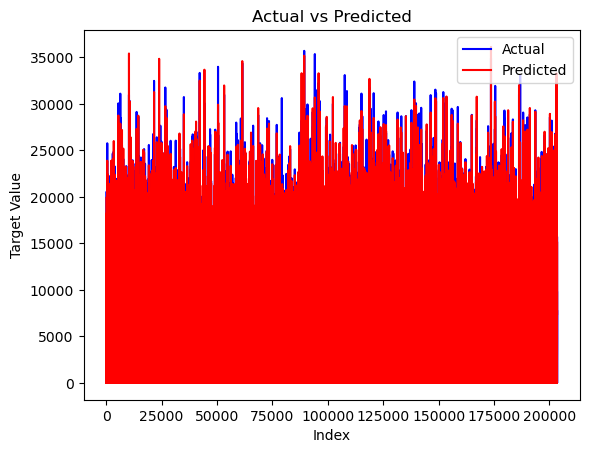

In [45]:
import matplotlib.pyplot as plt


# Suppose y_test are the actual values, and y_pred are the predicted values
plt.plot(y_test.values, label='Actual', color='Blue')
plt.plot(y_pred, label='Predicted', color='Red')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


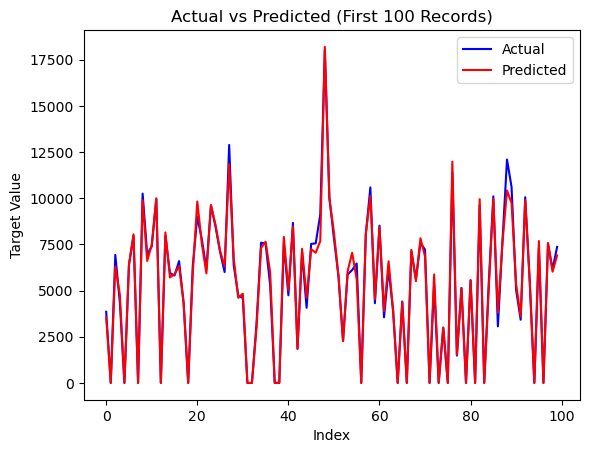

In [46]:
import matplotlib.pyplot as plt

plt.plot(y_test.values[:100], label='Actual', color='Blue')
plt.plot(y_pred[:100], label='Predicted', color='Red')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted (First 100 Records)')
plt.legend()
plt.show()


In [47]:
y_pred.size

203442

In [48]:
df.to_csv('cleaned_data.csv', index=False)

In [49]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,christmas_holiday,Month,Year
1016095,1,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
1016096,2,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
1016097,3,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
1016098,4,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
1016099,5,2,2013-01-01,0,0,0,0,1,1,0,0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5,2015-07-31,5723,422,1,1,1,0,0,0,7,2015
1111,1112,5,2015-07-31,9626,767,1,1,1,0,0,0,7,2015
1112,1113,5,2015-07-31,7289,720,1,1,1,0,0,0,7,2015
1113,1114,5,2015-07-31,27508,3745,1,1,1,0,0,0,7,2015


In [50]:
y_pred

array([3552.5 ,    0.  , 6306.91, ..., 5377.29, 2833.87, 7418.8 ])

In [51]:
x_test.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'public_holiday', 'easter_holiday', 'christmas_holiday', 'Month',
       'Year', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'Promo_Jan', 'Promo_Feb', 'Promo_Mar',
       'Promo_Apr', 'Promo_May', 'Promo_Jun', 'Promo_Jul', 'Promo_Aug',
       'Promo_Sept', 'Promo_Oct', 'Promo_Nov', 'Promo_Dec'],
      dtype='object')

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [53]:
x_test_s = scaler.fit_transform(x_test)
x_train_s = scaler.fit_transform(x_train)

In [54]:
import pickle

In [55]:
#previous rfr model save haneko
with open('rfr_model_no_scaling.pkl', 'wb') as file:
    pickle.dump(rfr_model, file)

In [56]:
rfr_model_scaled = RandomForestRegressor()

In [57]:
rfr_model_scaled.fit(x_train_s,y_train)

RandomForestRegressor()

In [58]:
rfr_model_scaled.score(x_test_s,y_test)

0.9861823136048865

In [59]:
#2nd approach with pca
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [61]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [65]:
#preprocessing  before doing pca
store_data['StoreType'] = store_data['StoreType'].astype('category')
store_data['Assortment'] = store_data['Assortment'].astype('category')
store_data = pd.get_dummies(store_data, columns=['StoreType', 'Assortment'], drop_first=True)
binary_cols = ['StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']

for col in binary_cols:
    store_data[col] = store_data[col].astype(int)
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].max(), inplace=True)

store_data['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(1900, inplace=True)
store_data['Promo2SinceWeek'].fillna(0, inplace=True)
store_data['Promo2SinceYear'].fillna(0, inplace=True)
store_data['PromoInterval'] = store_data['PromoInterval'].fillna('')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

for month in months:
    store_data[f'Promo_{month}'] = store_data['PromoInterval'].apply(lambda x: 1 if month in x else 0)
store_data.drop('PromoInterval', axis=1, inplace=True)

C:\Users\SubodhG\AppData\Local\Temp\ipykernel_101196\1583806274.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].max(), inplace=True)
C:\Users\SubodhG\AppData\Local\Temp\ipykernel_101196\1583806274.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [66]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




store_ids = store_data.iloc[:, 0]                # First column as store_id
features = store_data.iloc[:, 1:]                # All other columns as features

# Standardize features before PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=1)                # You can choose any number of components
features_pca = pca.fit_transform(features_scaled)

# Create DataFrame for PCA features
pca_df = pd.DataFrame(features_pca, columns=['store_coefficient'])  # name components as needed

# Concatenate store_id with PCA results
store_coeff = pd.concat([store_ids, pca_df], axis=1)

# Optional: Save or display the result
print(store_coeff.head())
# final_df.to_csv("pca_output.csv", index=False):


   Store  store_coefficient
0      1          -1.975324
1      2           3.237850
2      3           3.153435
3      4          -1.994694
4      5          -2.070300


In [79]:
df = pd.merge(train_data, store_coeff, on='Store')


In [73]:
df.drop(columns='Date',inplace=True)

In [76]:
x = df.drop(columns='Sales')
y = df['Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [77]:
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
rfr_model.score(x_test,y_test)

0.9819719397419573

In [82]:
df.to_csv('data_with_pca.csv',index=False)

In [98]:
#lets try training without store_data
df = train_data.copy()
df.drop(columns='Date',inplace=True)
x = df.drop(columns='Sales')
y = df['Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [100]:
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [101]:
rfr_model.score(x_test,y_test)

0.9626951921708815

LOW ACCURACY
The highest accuracy is given by rfr_model_no_scaling.pkl which i saved

In [102]:
#now lets visualize the seasonal trends 
data = pd.read_csv('cleaned_data.csv')
with open('rfr_model_no_scaling.pkl', 'rb') as file:
    rfr_model_no_scaling = pickle.load(file)

In [104]:
#before visualizing the seasonal trends we need to predict the test.csv and save it in sample submission.csv
test_data = pd.read_csv('test.csv')

In [107]:
#preprocess
test_data['public_holiday'] = test_data['StateHoliday'].apply(lambda x: 1 if x == 'a' else 0)
test_data['easter_holiday'] = test_data['StateHoliday'].apply(lambda x: 1 if x == 'b' else 0)
test_data['christmas_holiday'] = test_data['StateHoliday'].apply(lambda x: 1 if x == 'c' else 0)
test_data.drop(columns='StateHoliday',inplace=True)
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data = test_data.sort_values(by=['Date', 'Store'])
test_data['Month'] = test_data['Date'].dt.month
test_data['Year'] = test_data['Date'].dt.year

In [109]:
test_data.drop(columns='Id',inplace=True)

In [113]:
df = pd.merge(test_data, store_data, on='Store')

In [119]:
store_data

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sept,Promo_Oct,Promo_Nov,Promo_Dec
0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,4,620.0,9.0,2009.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,29910.0,4.0,2015.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,1900.0,6.0,2014.0,1,31.0,2013.0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1111,1112,1880.0,4.0,2006.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1112,1113,9260.0,1.0,1900.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,1114,870.0,1.0,1900.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
df.drop(columns='Date',inplace=True)

In [125]:
df

,Store,DayOfWeek,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,christmas_holiday,Month,Year,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sept,Promo_Oct,Promo_Nov,Promo_Dec
0,1,6,1.0,0,1,0,0,0,8,2015,...,0,0,0,0,0,0,0,0,0,0
1,3,6,1.0,0,0,0,0,0,8,2015,...,0,1,0,0,1,0,0,1,0,0
2,7,6,1.0,0,0,0,0,0,8,2015,...,0,0,0,0,0,0,0,0,0,0
3,8,6,1.0,0,0,0,0,0,8,2015,...,0,0,0,0,0,0,0,0,0,0
4,9,6,1.0,0,0,0,0,0,8,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,4,1.0,1,0,0,0,0,9,2015,...,0,1,0,0,1,0,0,1,0,0
41084,1112,4,1.0,1,0,0,0,0,9,2015,...,0,0,0,0,0,0,0,0,0,0
41085,1113,4,1.0,1,0,0,0,0,9,2015,...,0,0,0,0,0,0,0,0,0,0
41086,1114,4,1.0,1,0,0,0,0,9,2015,...,0,0,0,0,0,0,0,0,0,0


In [126]:
test_data = df.copy()

In [131]:
#since customer shows a very very strong correlation we need to not use it
train_data = pd.read_csv('cleaned_data.csv')
train_data.drop(columns='Customers',inplace=True)

In [132]:
train_data

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,public_holiday,easter_holiday,christmas_holiday,Month,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sept,Promo_Oct,Promo_Nov,Promo_Dec
0,1,2,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,3,2,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,4,2,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,2,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,5,5723,1,1,1,0,0,0,7,...,0,1,0,0,1,0,0,1,0,0
1017205,1112,5,9626,1,1,1,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
1017206,1113,5,7289,1,1,1,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
1017207,1114,5,27508,1,1,1,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0


In [134]:
x = train_data.drop(columns='Sales')
y = train_data['Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [137]:
rfr_final_model = RandomForestRegressor()


In [138]:
rfr_final_model.fit(x_train,y_train)

RandomForestRegressor()

In [139]:
rfr_final_model.score(x_test,y_test)

0.9333631043801961

In [140]:
xgb_final_model = XGBRegressor()

In [141]:
xgb_final_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [142]:
xgb_final_model.score(x_test,y_test)

0.9062314033508301

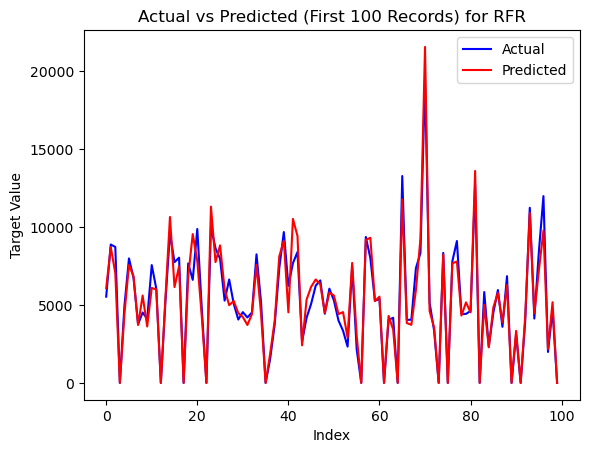

In [147]:
#plotting the shit for rfr
y_pred = rfr_final_model.predict(x_test)

plt.plot(y_test.values[:100], label='Actual', color='Blue')
plt.plot(y_pred[:100], label='Predicted', color='Red')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted (First 100 Records) for RFR')
plt.legend()
plt.show()

In [148]:


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

993.5204996646744

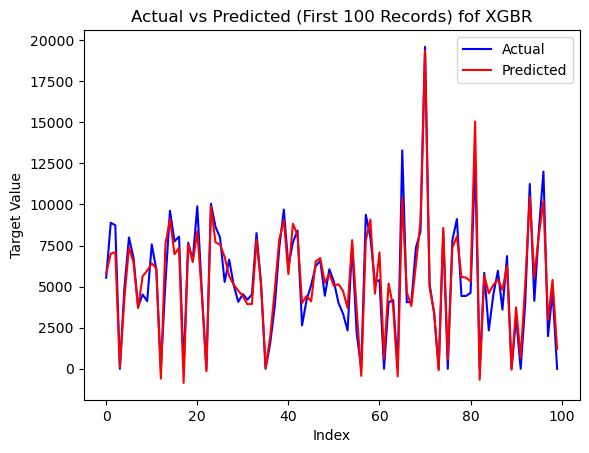

In [149]:
#xgb
y_pred = xgb_final_model.predict(x_test)
plt.plot(y_test.values[:100], label='Actual', color='Blue')
plt.plot(y_pred[:100], label='Predicted', color='Red')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted (First 100 Records) fof XGBR')
plt.legend()
plt.show()

In [150]:


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1178.550263723526

In [161]:
predicted_data = rfr_final_model.predict(test_data)

In [168]:
id = pd.read_csv('test.csv')

In [170]:
id = id.drop(columns=['Store','DayOfWeek','Date','Open','Promo','StateHoliday','SchoolHoliday'])

In [162]:
predicted_df = pd.DataFrame(predicted_data, columns=['Predicted_Sales'])
predicted_df.head()

,Predicted_Sales
0,4103.915867
1,3752.359500
2,6887.906706
3,3652.960750
4,5802.462119


In [172]:
result = pd.concat([id, predicted_df], axis=1)
result.head()

,Id,Predicted_Sales
0,1,4103.915867
1,2,3752.359500
2,3,6887.906706
3,4,3652.960750
4,5,5802.462119


In [174]:
result.to_csv('sample_submission.csv',index=False)